# 225229147

# Lab 7 Loan Approval Classification using SVM

## Step 1

In [1]:
import pandas as pd

In [2]:
tr=pd.read_csv('train_loan.csv')
tr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
tr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
tr.shape

(614, 13)

In [5]:
tr.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
tr.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
tr.value_counts

<bound method DataFrame.value_counts of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849  

In [9]:
#Step 2

In [10]:
tr['Dependents']=tr['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3})

In [11]:
tr['Gender']=tr['Gender'].fillna(tr['Gender'].mode()[0])
tr['Dependents']=tr['Dependents'].fillna(tr['Dependents'].mode()[0])

In [12]:
tr['Married']=tr['Married'].fillna(tr['Married'].mode()[0])
tr['Education']=tr['Education'].fillna(tr['Education'].mode()[0])
tr['Self_Employed']=tr['Self_Employed'].fillna(tr['Self_Employed'].mode()[0])
tr['Credit_History']=tr['Credit_History'].fillna(tr['Credit_History'].mode()[0])

In [13]:
tr['LoanAmount']=tr['LoanAmount'].fillna(tr['LoanAmount'].mean())

In [14]:
tr['Loan_Amount_Term']=tr['Loan_Amount_Term'].fillna(tr['Loan_Amount_Term'].mode()[0])

In [15]:
tr=tr.drop('Loan_ID',axis=1)
tr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [16]:
#Step 3

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

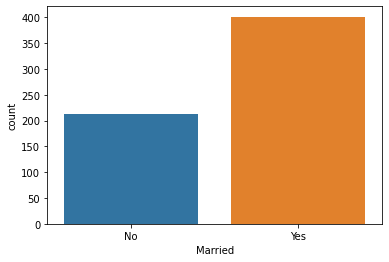

In [18]:
sns.countplot(x='Married',data=tr)
plt.show()

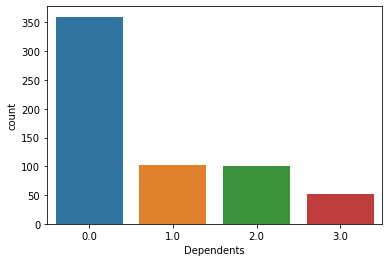

In [19]:
sns.countplot(x='Dependents',data=tr)
plt.show()

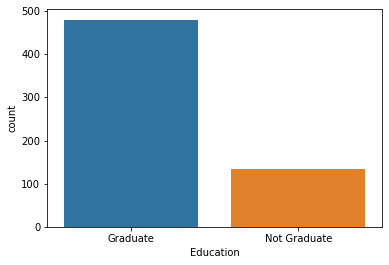

In [20]:
sns.countplot(x='Education',data=tr)
plt.show()

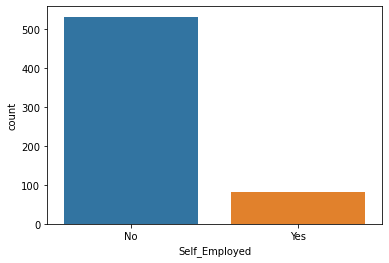

In [21]:
sns.countplot(x='Self_Employed',data=tr)
plt.show()

In [22]:
#Step 4

In [23]:
X=tr.drop('Loan_Status',axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban


In [24]:
tr['Loan_Status']=tr['Loan_Status'].replace({'Y':1,'N':0})

In [25]:
y=tr[['Loan_Status']]
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [26]:
#Step 5

In [27]:
X=pd.get_dummies(X)
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
1,1.0,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.000000,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3.0,4106,0.0,40.000000,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253.000000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
612,2.0,7583,0.0,187.000000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [28]:
#Step 6

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [61]:
X_train

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
90,0.0,2958,2900.0,131.0,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0
533,1.0,11250,0.0,196.0,360.0,1.0,0,1,1,0,1,0,1,0,0,1,0
452,0.0,3948,1733.0,149.0,360.0,0.0,0,1,0,1,1,0,1,0,1,0,0
355,0.0,3813,0.0,116.0,180.0,1.0,1,0,1,0,1,0,1,0,0,0,1
266,2.0,4708,1387.0,150.0,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.0,3103,1300.0,80.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
9,1.0,12841,10968.0,349.0,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0
359,3.0,5167,3167.0,200.0,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0
192,0.0,6033,0.0,160.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1


In [62]:
X_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
454,0.0,7085,0.0,84.0,360.0,1.0,0,1,1,0,1,0,0,1,0,1,0
52,0.0,4230,0.0,112.0,360.0,1.0,1,0,1,0,1,0,1,0,0,1,0
536,0.0,6133,3906.0,324.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
469,0.0,4333,2451.0,110.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
55,2.0,2708,1167.0,97.0,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2.0,2500,4600.0,176.0,360.0,1.0,0,1,0,1,1,0,0,1,1,0,0
376,3.0,8750,4996.0,130.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
278,0.0,14583,0.0,436.0,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0
466,3.0,2947,1664.0,70.0,180.0,0.0,0,1,0,1,0,1,1,0,0,0,1


In [63]:
y_train

,Loan_Status
90,1
533,0
452,0
355,1
266,1
...,...
277,1
9,0
359,1
192,0


In [64]:
y_test

,Loan_Status
454,1
52,0
536,1
469,0
55,1
...,...
337,1
376,1
278,1
466,0


In [65]:
SS=StandardScaler()
SSX_train=SS.fit_transform(X_train)
SSX_test=SS.transform(X_test)

In [66]:
from sklearn.svm import LinearSVC
LSVC=LinearSVC()
LSVC.fit(SSX_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [67]:
y_pred=LSVC.predict(SSX_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score
AS1=accuracy_score(y_test,y_pred)
AS1

0.8373983739837398

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[15, 18],
       [ 2, 88]], dtype=int64)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



In [71]:
#Step 7

In [81]:
from sklearn.linear_model import LogisticRegression
lgr= LogisticRegression()
lgr.fit(SSX_train,y_train)
lr_y_pred = lgr.predict(SSX_test)
print("LogisticRegression:",accuracy_score(y_test,lr_y_pred))


LogisticRegression: 0.8373983739837398


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()
SGD.fit(SSX_train,y_train)
SGD_y_pred = SGD.predict(SSX_test)
print("SGDClassifier :",accuracy_score(y_test,SGD_y_pred))

SGDClassifier : 0.7073170731707317


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
from sklearn.svm import SVC
model1=SVC(kernel='linear')
model1.fit(SSX_train, y_train)
m1y_pred = model1.predict(SSX_test)
accuracy_score(y_test, m1y_pred)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8292682926829268

In [89]:
from sklearn.svm import SVC
model2=SVC(kernel='poly',C=1.0,gamma=0.5)
model2.fit(SSX_train, y_train)
m2y_pred = model2.predict(SSX_test)
accuracy_score(y_test, m2y_pred)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7804878048780488

In [88]:
from sklearn.svm import SVC
model3=SVC(kernel='rbf',C=1.0,gamma=0.7)
model3.fit(SSX_train, y_train)
m3y_pred = model3.predict(SSX_test)
accuracy_score(y_test, m3y_pred)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7967479674796748

In [90]:
from sklearn.svm import SVC
model4=SVC(kernel='sigmoid')
model4.fit(SSX_train, y_train)
m4y_pred = model4.predict(SSX_test)
accuracy_score(y_test, m4y_pred)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8130081300813008